### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import seaborn as sns

import ScraperFC as sfs
from mplsoccer import Pitch, VerticalPitch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Fonts and colors 
from matplotlib import font_manager
locations = ['/Users/emilio/Documents/3- Resources/lightstats/fonts/Montserrat']
font_files = font_manager.findSystemFonts(fontpaths=locations)
for file in font_files:
    font_manager.fontManager.addfont(file)
font = 'Montserrat'

# Define the colors using hexadecimal representations
background_color = '#F7F7F7' 
title_color = '#000000'   
text_color = '#333333'  
sub_text_color = '#808080'   
accent_color1 = '#4682B4'    
accent_color2 = '#ADD8E6' 

### Scrap

In [3]:
# Scrap sofascore
sofascore = sfs.Sofascore()

sofascore_url = 'https://www.sofascore.com/real-madrid-fc-bayern-munchen/xdbsEgb#id:12173506'
sofascore_url = sofascore_url.replace('id:', '')

### Data

In [5]:
def get_opponent_team(df, playerName):
    # Filter rows where playerName matches
    player_df = df[df['name'] == playerName]

    # Get the player's team name
    player_team = player_df['team'].unique()[0]

    # Find the opponent team
    opponent_team = df[df['team'] != player_team]['team'].unique()[0]

    return opponent_team

#### Average Positions Data

In [41]:
local = sofascore.get_players_average_positions(sofascore_url)[0]
localPositions = local[['jerseyNumber', 'averageX', 'averageY']]
localname = local['team'].unique()[0]

away = sofascore.get_players_average_positions(sofascore_url)[1]
awayPositions = away[['jerseyNumber', 'averageX', 'averageY']]
awayname = away['team'].unique()[0]

,jerseyNumber,averageX,averageY
0,7,66.979245,66.173585
1,21,55.966667,24.975000
2,22,29.674074,42.014815
3,5,54.867692,48.413846
4,18,44.037681,42.317391
5,23,42.600000,89.095652
6,11,55.206122,61.310204
7,13,7.458333,48.300000
8,15,48.810526,31.012281
9,12,45.406250,56.550000


#### Heatmap data

In [7]:
# Players 
teamsDf = pd.concat([local, away])
teamsDf['name'].unique()

array(['Thomas Müller', 'Harry Kane', 'Leon Goretzka',
       'Raphaël Guerreiro', 'Leroy Sané', 'Serge Gnabry', 'Konrad Laimer',
       'Noussair Mazraoui', 'Manuel Neuer', 'Alphonso Davies',
       'Min-jae Kim', 'Jamal Musiala', 'Joshua Kimmich', 'Eric Dier',
       'Vinícius Júnior', 'Brahim Díaz', 'Antonio Rüdiger',
       'Jude Bellingham', 'Aurélien Tchouaméni', 'Ferland Mendy',
       'Rodrygo', 'Andriy Lunin', 'Federico Valverde', 'Toni Kroos',
       'Eduardo Camavinga', 'Nacho Fernández', 'Joselu', 'Luka Modrić',
       'Lucas Vázquez'], dtype=object)

In [8]:
playerName = 'Vinícius Júnior'
opponent_team = get_opponent_team(teamsDf, playerName)
player_heatmap = sofascore.get_player_heatmap(sofascore_url, playerName)

### Average Positions

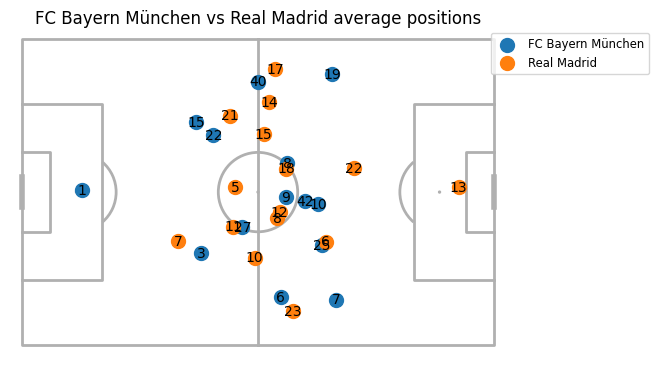

In [48]:
fig, ax = plt.subplots()
pitch = Pitch(pitch_type='opta', half=False)
pitch.draw(ax=ax)

# Suponiendo que tienes definido tu scatter plot como pitch.scatter(...) y tienes definidos los datos localPositions, awayPositions, localname y awayname

# Primero, dibuja tu scatter plot para los jugadores locales
pitch.scatter(localPositions['averageX'], localPositions['averageY'], ax=ax, s=100, label=f'{localname}')

# Luego, agrega los números de camiseta para los jugadores locales
for i, jersey_number in enumerate(localPositions['jerseyNumber']):
    ax.annotate(jersey_number, (localPositions['averageX'].iloc[i], localPositions['averageY'].iloc[i]), fontsize=10, ha='center', va='center')

# Ahora, dibuja tu scatter plot para los jugadores visitantes
pitch.scatter(100-awayPositions['averageX'], 100-awayPositions['averageY'], ax=ax, s=100, label=f'{awayname}')

# Luego, agrega los números de camiseta para los jugadores visitantes
for i, jersey_number in enumerate(awayPositions['jerseyNumber']):
    ax.annotate(jersey_number, (100-awayPositions['averageX'].iloc[i], 100-awayPositions['averageY'].iloc[i]), fontsize=10, ha='center', va='center')

# Configura el título y la leyenda
ax.set_title(f'{localname} vs {awayname} average positions', va='center')
legend = plt.legend(loc='upper right', fontsize='small')
legend.set_bbox_to_anchor((1.3, 1))  # Ajusta la posición de la leyenda ligeramente fuera del gráfico

# Muestra el gráfico
plt.show()


### Heatmap

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mplsoccer/_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


Text(50, -5, 'Attack')

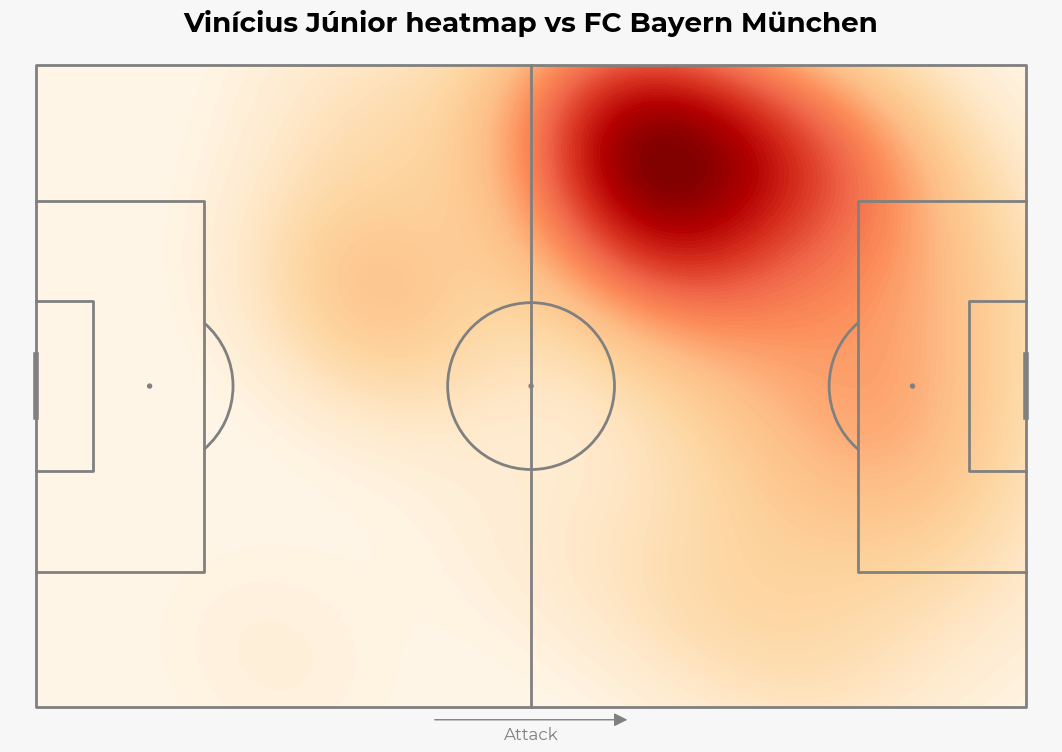

In [31]:
fig, ax = plt.subplots(figsize=(16,9))
fig.set_facecolor(color=background_color)

cmap = 'hot'
pitch = Pitch(pitch_type='opta', pitch_color=background_color, line_color=sub_text_color)
pitch.draw(ax=ax)
pitch.kdeplot(player_heatmap.x, player_heatmap.y, ax=ax,
              levels=100,
              shade=True,
              zorder=-1,
              shade_lowest=True,
              cmap='OrRd'
)
plt.gca()

ax.set_title(f'{playerName} heatmap vs {opponent_team}', fontsize=20, fontfamily=font, color=title_color, weight='bold')

arrow = FancyArrowPatch((40, -2), (60, -2), mutation_scale=20, color=sub_text_color, arrowstyle='-|>')
ax.add_patch(arrow)
ax.text(50, -5, 'Attack', fontsize=12, ha='center', fontfamily=font, color=sub_text_color)